<a href="https://colab.research.google.com/github/robbypambudi/Shortest-Path-Analysis/blob/main/Dijkstra_Algoritm_Soal_No_1_Poin_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph - Shortest Path (Dijkstra Algoritm)

- Algoritma Dijkstra adalah sebuah prosedur iteratif yang mencari lintasan terpendek antara a dan z dalam graf dengan pembobot.
- Prosesnya dengan cara mencari panjang lintasan terpendek dari sebuah simpul pendahulu  dan menambahkan simpul-simpul tersebut ke set simpul S.
- Algoritma berhenti setelah mencapai simpul z.

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import time

In [4]:
# create class for graph visualization
class GraphVisualization:
  def __init__(self, graph):
    self.G = nx.Graph()
    self.graph = graph
    self.nodes = list(graph.keys())

  # method for add edges
  def addEdge(self, a, b, weight):
    self.G.add_edge(a, b, weight=weight)

  # method for visualize a graph
  def visualize(self):
    pos = nx.spring_layout(self.G)
    weights = nx.get_edge_attributes(self.G, "weight")

    self.G.add_nodes_from(self.nodes)
    plt.figure()
    nx.draw(
      self.G, pos, edge_color='black', width=1, linewidths=1,
      node_size=500, node_color='pink', alpha=0.9,
      labels={node: node for node in self.G.nodes()}
    )
    nx.draw_networkx_edge_labels(self.G, pos, edge_labels=weights)
    plt.axis('off')
    plt.show()

  # visualize a graph
  def graph_visualize(self):
    for i in self.graph:
      for j in self.graph[i]:
        self.addEdge(i, j['v'], j['w'])

    self.visualize()

In [5]:
# Created graph
graph = {
    'V1': [{'v': 'V2','w': 2}, {'v': 'V4','w': 1}, {'v': 'V3', 'w': 8}],
    'V2': [{'v': 'V1','w': 2}, {'v': 'V5','w': 1}, {'v': 'V3','w': 6}],
    'V3': [{'v': 'V1','w': 8}, {'v': 'V2','w': 6}, {'v': 'V4','w': 7}, {'v': 'V5','w': 5}, {'v': 'V6','w': 1}, {'v': 'V7','w': 2}],
    'V4': [{'v': 'V1','w': 1}, {'v': 'V3','w': 7}, {'v': 'V7','w': 9}],
    'V5': [{'v': 'V2','w': 1}, {'v': 'V3','w': 5}, {'v': 'V6','w': 3}, {'v': 'V9','w': 7}],
    'V6': [{'v': 'V3','w': 1}, {'v': 'V5','w': 3}, {'v': 'V9','w': 9}, {'v': 'V7','w': 4}],
    'V7': [{'v': 'V3','w': 2}, {'v': 'V4','w': 9}, {'v': 'V6','w': 4}, {'v': 'V9','w': 3}, {'v': 'V10','w': 1}],
    'V8': [{'v': 'V5','w': 2}, {'v': 'V9','w': 7}, {'v': 'V11','w': 9}],
    'V9': [{'v': 'V5','w': 9}, {'v': 'V6','w': 6}, {'v': 'V7','w': 3}, {'v': 'V8','w': 7}, {'v': 'V10','w': 1}, {'v': 'V11','w': 2}],
    'V10': [{'v': 'V7','w': 1}, {'v': 'V9','w': 1}, {'v': 'V11','w': 4}],
    'V11': [{'v': 'V8','w': 9}, {'v': 'V9','w': 2}, {'v': 'V10','w': 4}],
}

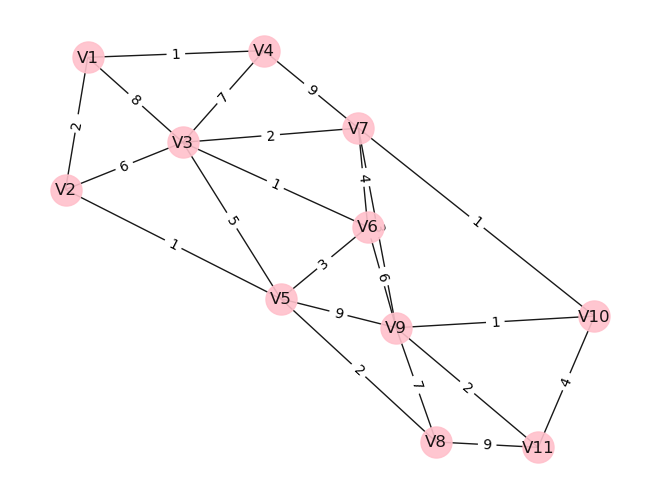

In [7]:
# visualize graph
G = GraphVisualization(graph=graph)
G.graph_visualize()

In [8]:
# function for get path weight
def get_path_weight(path):
  path_weight = 0

  for index, value in enumerate(path):
    try:
      for j in graph[value]:
        if j['v'] == path[index + 1]:
            path_weight += j['w']
    except:
      break

  return path_weight

In [9]:
# function to find the shortest path (dijkstra algorithm)
def find_shortest_path(graph, start, end, path =[]):
  path = path + [start]
  shortest = None
  weights = None

  if start == end: return path

  for node in graph[start]:
      if node['v'] not in path:
          newpath = find_shortest_path(graph, node['v'], end, path)
          if newpath:
            new_wexight = get_path_weight(newpath)
            if not weights or new_wexight < weights:
              shortest = newpath
              weights = new_wexight

  return shortest

In [10]:
start = time.time()
shortest_path = find_shortest_path(graph, 'V1', 'V11')
weight_shortest_path = get_path_weight(shortest_path)
end = time.time()

print('Shortest Path :', shortest_path)
print('Weight :', weight_shortest_path)
print('Time :', end - start)

Shortest Path : ['V1', 'V2', 'V5', 'V9', 'V11']
Weight : 12
Time : 0.0013909339904785156


{'V1': [{'v': 'V2', 'w': 2}], 'V2': [{'v': 'V5', 'w': 1}], 'V5': [{'v': 'V9', 'w': 7}], 'V9': [{'v': 'V11', 'w': 2}]}


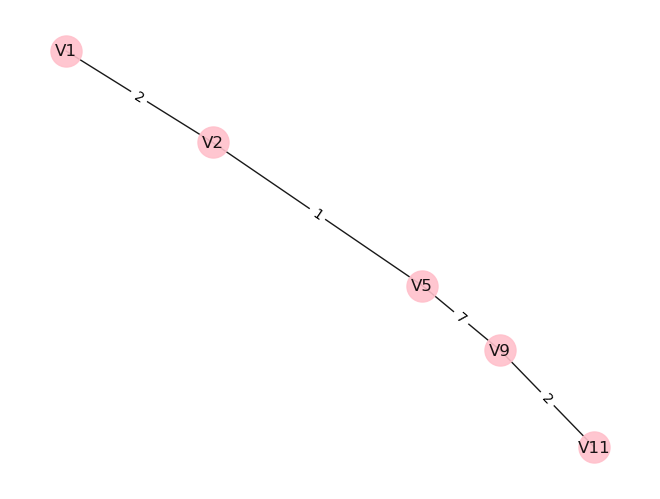

In [11]:
shortest_graph = {}

# generate shortest_graph
for index, value in enumerate(shortest_path):
  try:
    for j in graph[value]:
      if j['v'] == shortest_path[index + 1]:
        shortest_graph.update({value: [j]})
  except:
    break

# print(shortest_graph)

# Visualize shortest path
S = GraphVisualization(shortest_graph)

for i in shortest_graph:
  for j in shortest_graph[i]:
        S.addEdge(i, j['v'], j['w'])

S.visualize()